Koostööd sai tehtud grupis järgnevate inimestega: Oskar Pihlak ja Karl Viik

# Klasterdamine

## Sisukord

* [Sarnaste objektide klastritesse rühmitamine k-keskmiste(*k-means*) meetodiga](#k_means_p)
* [Ülesanne 11.1](#11_1)
* [K-keskmiste meetodi teooria](#k_means_t)
* [Küünarnukimeetod](#kyynar)
* [Siluetimeetod](#siluett)
* [Hierarhiline klasterdamine](#hier)
* [DBSCAN meetod](#DBSCAN)
* [Ülesanne 11.2](#11_2)

Põhineb S.Raschka *Python Machine Learnig* raamatu 
[peatükil 11](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch11) ([*MIT litsents*](https://github.com/rasbt/python-machine-learning-book/blob/master/LICENSE.txt)).

## Sarnaste objektide klastritesse rühmitamine k-keskmiste(*k-means*) meetodiga *sklearn* teegis

Klasterdamise eesmärk on sarnaste objektide jaotamine gruppidesse ehk klastritesse. Tüüpiliselt põhineb sarnasus objektide kui n-mõõtmeliste punktide kaugusel teatud mõõdu järgi (Eukleidese kaugus jms). Kõigepealt vaatame klasterdamismeetodi praktilist kasutamist klassi [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) näitel.

In [61]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine, make_blobs, make_moons
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [62]:
# Genereerime juhusliku müraga kolme gruppi kuuluvad 2D andmed

X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

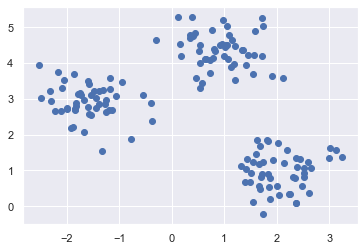

In [63]:
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1])
plt.show()
#plt.grid()

In [64]:
# Meetod fit_predict väljastab klasterdamismeetodi korral klastrinumbrite vektori
# KMeans eeldab, et anname eeldatava klastrite arvu n_clusters ette.
km = KMeans(n_clusters=3,
           init='random',
           n_init=10,
           max_iter=300,
           tol=0.00001,
           random_state=0)
y_km = km.fit_predict(X)
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

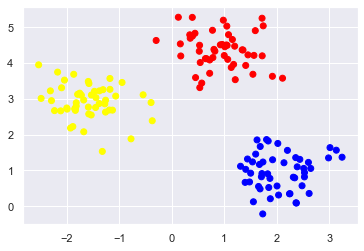

In [65]:
# Kuvame klastrid värviliselt
colormap = {0: "red", 1: "blue", 2: "yellow", 
            3: "green", 4: "cyan", 5: "orange",
            6: "purple", 7: "brown", 8: "magenta",
            -1: "black"}
plt.scatter(X[:, 0], X[:, 1], c=[colormap[c_id] for c_id in y_km])
#plt.grid()
plt.show()

In [66]:
# Vaatame klastrite keskpunkte
km.cluster_centers_

array([[ 0.9329651 ,  4.35420712],
       [ 2.06521743,  0.96137409],
       [-1.5947298 ,  2.92236966]])

##  Ülesanne 11.1

Laadida veinide andmestik, nagu näidatud allpool. Standardiseerida see klassi [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) abil ja teisendada tulemus klassi [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) abil kahe peakomponendilisele st kahemõõtmelisele kujule: `PCA(n_components=2)`.

* Kuvada selle andmestiku hajuvusgraafik `plt.scatter()`
* Jaotada [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) klassi abil andmed kolmeks klastriks.
* Kuvada need klastrid hajuvusgraafikul.
* Võrrelge leitud klastreid tegelike klassidega `yw`. Kuivõrd need kattuvad?

In [67]:
wine_data = load_wine()
Xw = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
yw = wine_data.target
Xw.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Peakomponentide seletatud variatsioon
[0.36198848 0.1920749 ] 0.5540633835693534


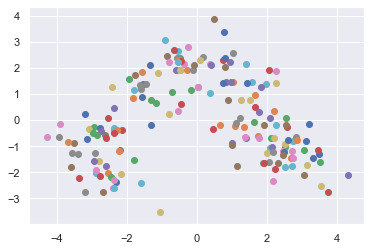

In [89]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(wine_data.data)
pca = PCA(n_components=2)
X = pca.fit_transform(X)

print("Peakomponentide seletatud variatsioon")
print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
for x, y in X:
    plt.scatter(x, y)
plt.show()

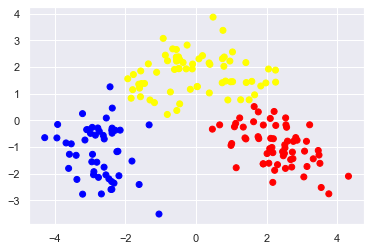

In [69]:
# Meetod fit_predict väljastab klasterdamismeetodi korral klastrinumbrite vektori
# KMeans eeldab, et anname eeldatava klastrite arvu n_clusters ette.
km = KMeans(n_clusters=3,
           init='random',
           n_init=10,
           max_iter=300,
           tol=0.00001,
           random_state=0)
y_km = km.fit_predict(X)
y_km

# Kuvame klastrid värviliselt
colormap = {0: "red", 1: "blue", 2: "yellow", 
            3: "green", 4: "cyan", 5: "orange",
            6: "purple", 7: "brown", 8: "magenta",
            -1: "black"}
plt.scatter(X[:, 0], X[:, 1], c=[colormap[c_id] for c_id in y_km])
#plt.grid()
plt.show()

In [93]:
y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [92]:
yw

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [108]:
new_yw = [x if not x else 1 if x==2 else 2 for x in yw]
print(len(new_yw) - sum([y_km[i]==new_yw[i] for i in range(len(yw))]), "elements from", len(yw), "are different")

6 elements from 178 are different


Sellest vaatab, et kattuvus on suur

<a id='k_means_t'></a>
## K-keskmiste meetodi teooria

K-keskmiste klasterdamine põhineb $m$-mõõtmelise andmestiku kahe punkti (objekti) $x$, $y$  vahelise Eukleidese kauguste ruudul:

$$ d(\textbf{x}, \textbf{y})^2 = \sum_{j=1}^m (x_j - y_j)^2 $$

In [70]:
def d_squared(x, y):
    return sum((x-y)**2)

x = np.array([1, 2, 3])
y = np.array([2, 1, -1])
print(d_squared(x, y))
print(d_squared(x, x))

18
0


K-keskmiste klasterdamine minimeerib $k$ klastri punktide $\pmb{x}^{(i)}$ ja  klastri keskpunktide $\pmb{\mu}^{(j)}$ vaheliste kauguste (vigade)  ruutude $d(\pmb{x}, \pmb{\mu})^2$ summat (*sum of squared errors*):
$$ SSE = \sum_{i=1}^n \sum_{j=1}^k w^{(i, j)} d(\pmb{x}^{(i)}, \pmb{\mu}^{(j)})^2 $$
Kaal $w^{(i, j)}$ on 1 kui objekt ${x}^{(i)}$ kuulub klastrisse $j$, muidu on see kaal 0. Klastrite arv $k$ on etteantud.

<a id='kyynar'></a>
## Küünarnuki (*elbow*) meetod optimaalse klastrite arvu hindamiseks

Optimaalse klastrite arvu leidmiseks saab kasutada $SSE$ mõõtu (kui on tegemist Eukleidese kaugusega). $SSE$ väheneb koos klastrite arvu kasvamisega, alguses tavaliselt kiiresti, hiljem aeglasemalt. Üldiselt soovime me kombineerida väikese klastrite arvu väikese $SSE$ mõõduga. Küünarnuki meetod tähendab $SSE$, klastrite arv graafikul nullpunktile lähima kombinatsiooni (küünarnuki) leidmist. Scikit-learn teegis vastab $SSE$ mõõdule  `KMeans` objekti atribuut `inertia_`.

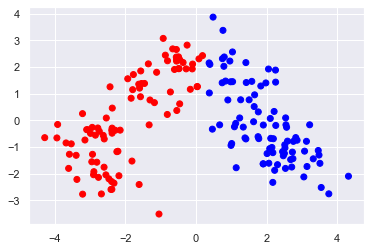

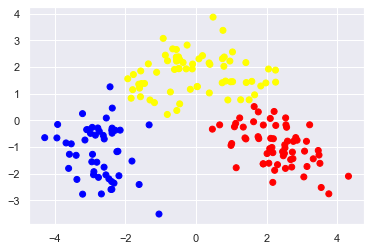

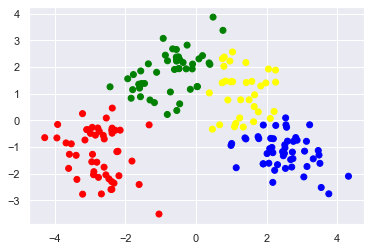

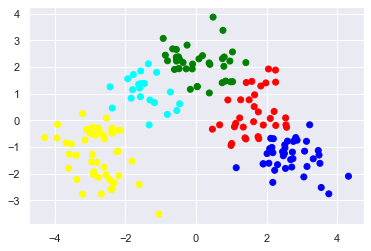

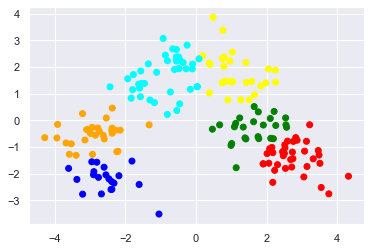

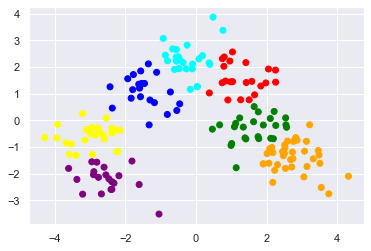

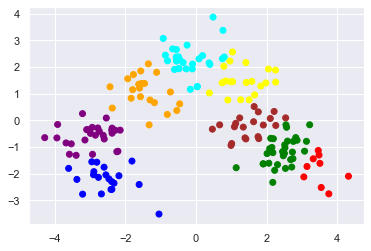

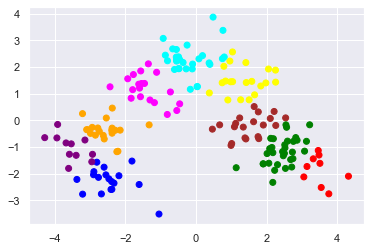

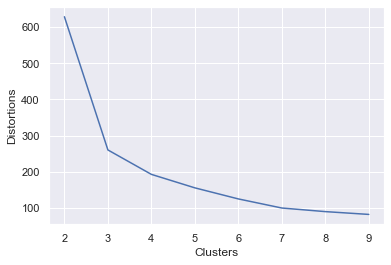

In [71]:
distortions = []
for i in range(2, 10):
    km.set_params(n_clusters=i)
    y_km_i = km.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=[colormap[c_id] for c_id in y_km_i])
    #plt.grid()
    plt.show()
    distortions.append(km.inertia_)
    
plt.plot(range(2, 10), distortions)
plt.xlabel("Clusters")
plt.ylabel("Distortions")
plt.show()

<a id='siluett'></a>
## Siluetidiagrammid

Alternatiivne ja detailsem klasterdamise kvaliteedi hindamise meetod on siluetianalüüs, mis võimaldab hinnata, kuvõrd tihedalt klastrid objekte grupeerivad. Igale objektile $i$ leitakse siluetikoefitsent $s^{(i)}$:

$$ s^{(i)} = \frac{b^{(i)} - a^{(i)}}{max(b^{(i)}, a^{(i)})} $$

, kus $a^{(i)}$ on objekti $i$ keskmine kaugus sama klastri objektidest ja  $b^{(i)}$ on objekti $i$ keskmine kaugus järgmise lähima klastri objektidest. Siluetikoefitsent on vahemikus -1 ja 1, ideaaljuhul $b^{(i)} >> a^{(i)}$ on see 1, juhul kui $b^{(i)} = a^{(i)}$ on siluetikoefitsent 0.

Siluetidiagrammil on klastrid näidatud erinevate värvidega ja objektid, millele vastavad objekti siluetikoefitsenti horisontaaljooned, on klastri sees sorditud siluetikoefitsendi järgi. Keskmist siluetikoefitsenti kujutab punane vertikaalpunktiir. Olulised asjad, mida sellel diagrammil kontrollida on keskmine siluetikoefitsent, klastrite suurus (võiksid olla enam-vähem võrdsed), eriti madala siluetikoefitsendiga objektide (anomaaliate) arv ja jaotus klastrite vahel.


In [72]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def draw_silhouette_plots(X, range_n_clusters = range(2, 10)):

# See kood on võetud suuresti 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.46491409089201524
For n_clusters = 3 The average silhouette_score is : 0.5610505693103247
For n_clusters = 4 The average silhouette_score is : 0.4914213395710316
For n_clusters = 5 The average silhouette_score is : 0.441713804738957
For n_clusters = 6 The average silhouette_score is : 0.43227510669772384
For n_clusters = 7 The average silhouette_score is : 0.4235706060721868
For n_clusters = 8 The average silhouette_score is : 0.40808048784150286
For n_clusters = 9 The average silhouette_score is : 0.40091150232645184


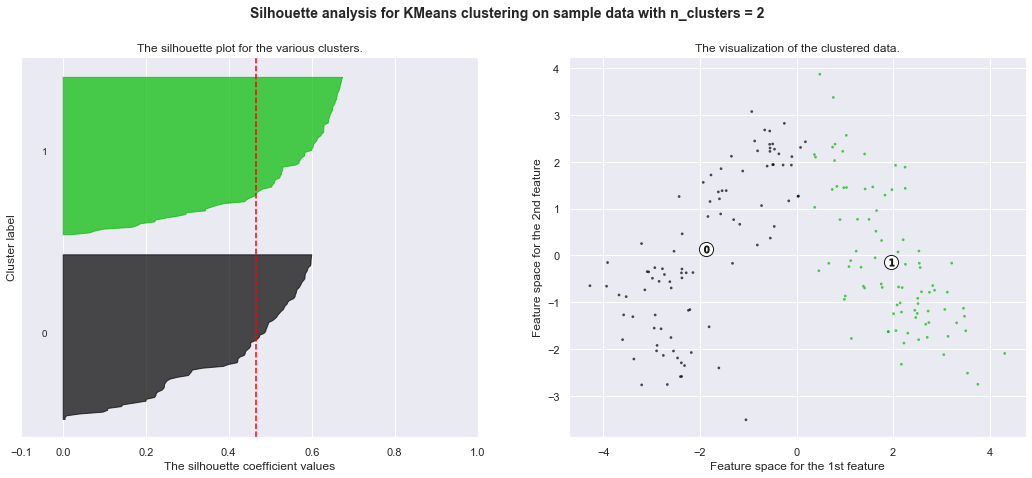

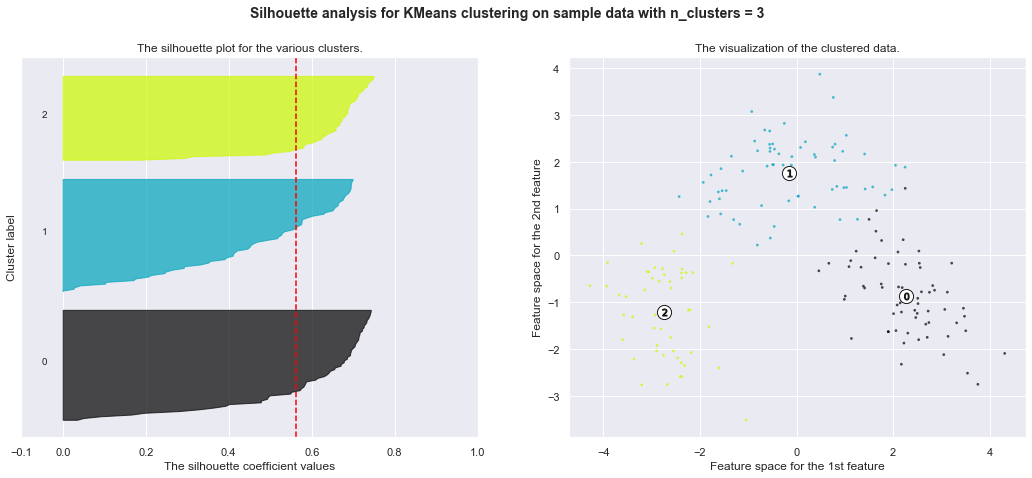

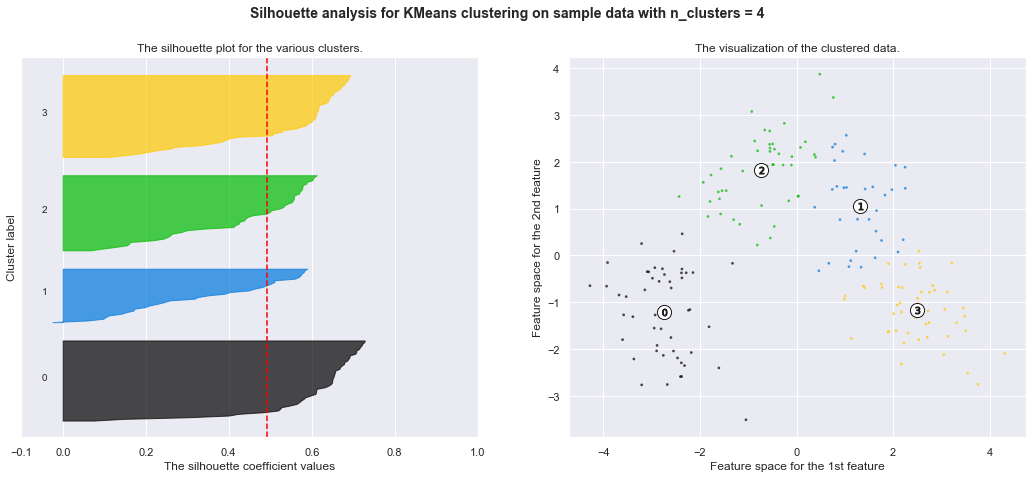

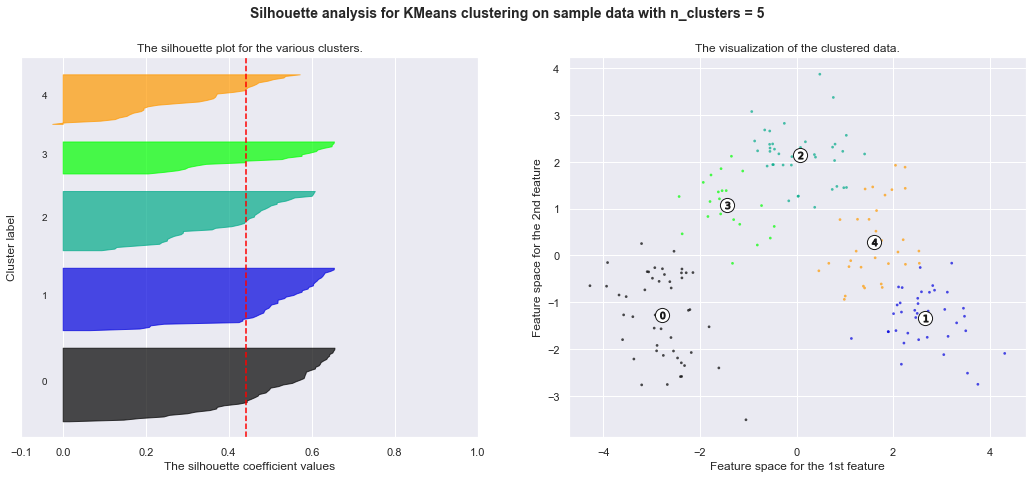

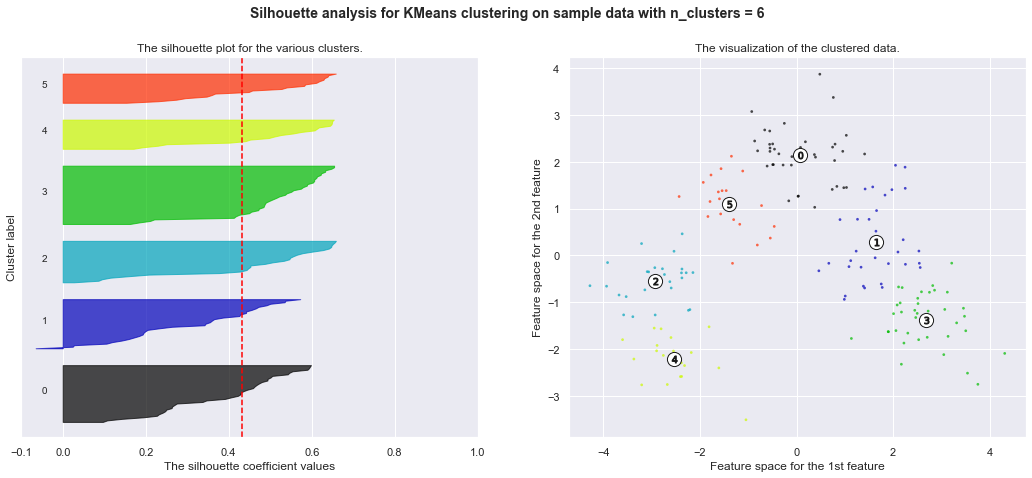

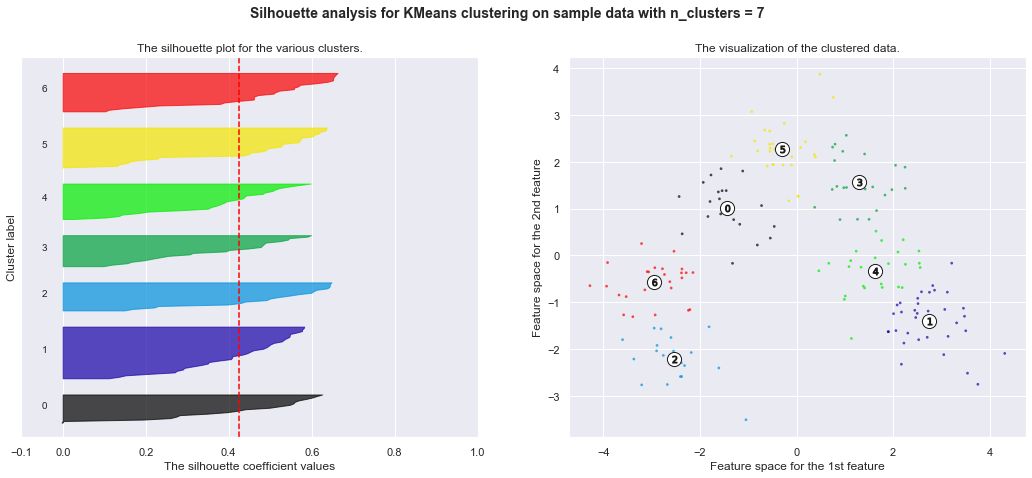

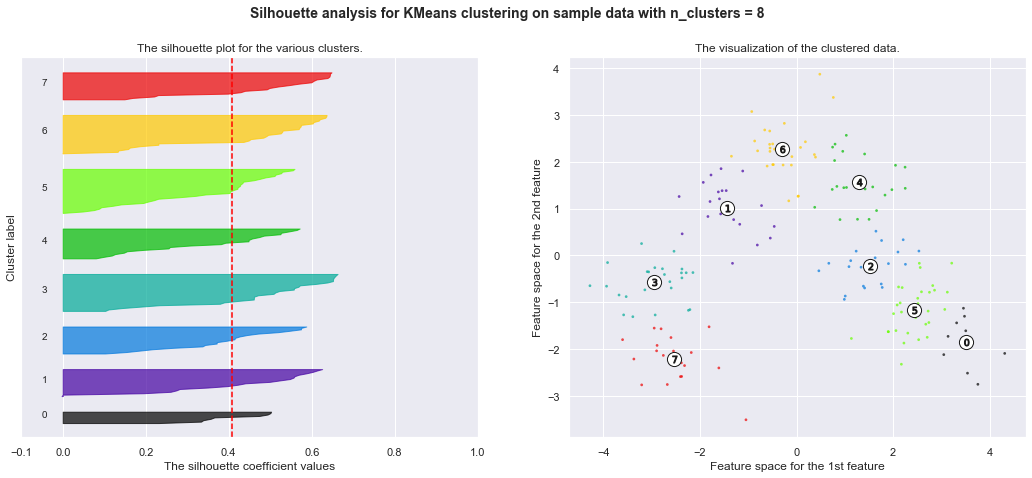

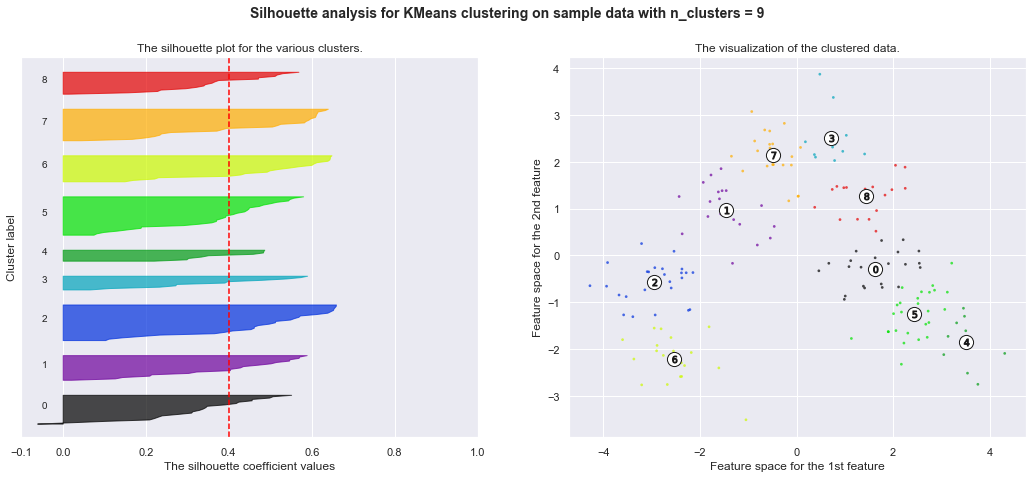

In [73]:
draw_silhouette_plots(X)

<a id='hier'></a>
## Hierarhiline klasterdamine

Hierarhiline klasterdamine organiseerib klastrid ülem-ja alamklastrite hierarhiaks. Siin ei ole vaja klastrite arvu ette anda. Vaatame näitena veinide atribuutide korrelatsioonimaatriksi korrastamist
[seaborn clustermap() funktsiooni](https://seaborn.pydata.org/generated/seaborn.clustermap.html) abil. Vt ka näiteks [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) klass.

In [74]:
cols = wine_data.feature_names
W_cm = pd.DataFrame(np.corrcoef(Xw.T), 
                    columns=cols, 
                    index=cols)
W_cm

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


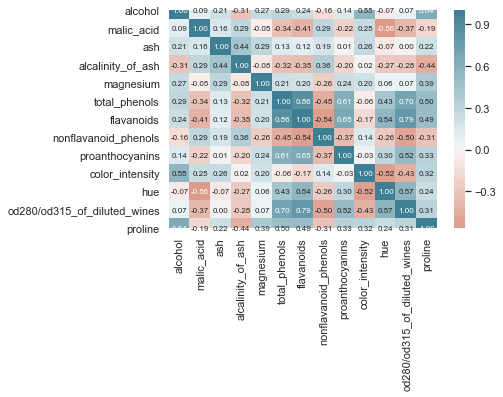

In [75]:
import seaborn as sns

cmap = sns.diverging_palette(20, 220, as_cmap=True)
sns.set(font_scale=1.0)
hm = sns.heatmap(W_cm, cbar=True, annot=True, fmt='.2f', cmap=cmap, center=0.0,
                 annot_kws={'size': 8}, yticklabels=cols, xticklabels=cols)

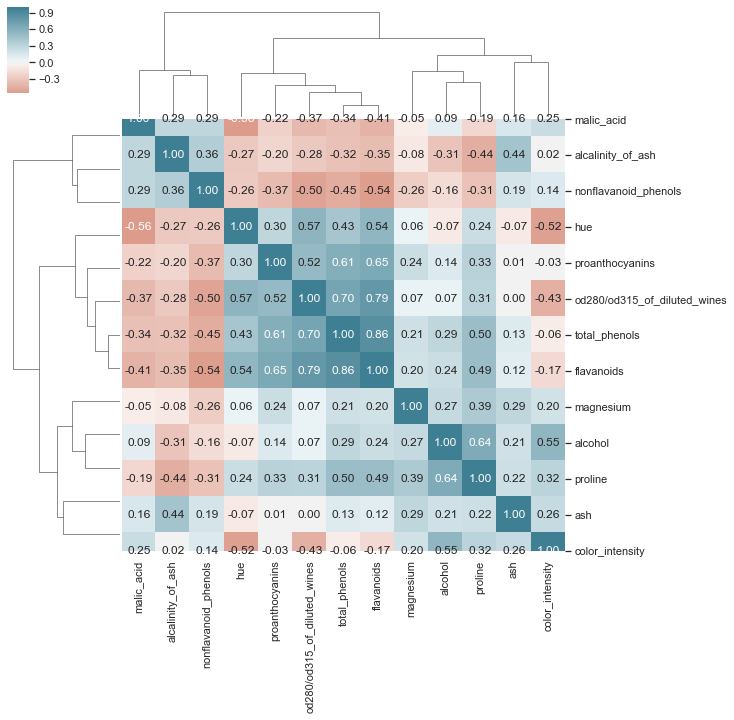

In [76]:
g = sns.clustermap(W_cm, annot=True, fmt='.2f', cmap=cmap, center=0.0)

<a id='dbscan'></a>
## DBSCAN

K-keskmiste meetod sobib hästi ovaalisarnaste klastrite tuvastamiseks. Samas võivad meie andmepunktid moodustada keerukamaid kujundeid, kus lihtne kaugus klastri keskpunktist ei ole enam parim mõõt ja tasub kaaluda alternatiivseid meetodeid, nagu
[DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) (*Density-Based Spatial Clustering of Applications with Noise*). 

Vaatame näidet, kus k-keskmiste meetod hätta jääb:

In [77]:
Xm, ym = make_moons(n_samples=150, noise=0.05, random_state=0)

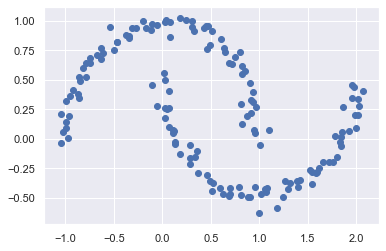

In [78]:
plt.scatter(Xm[:, 0], Xm[:, 1])
plt.show()

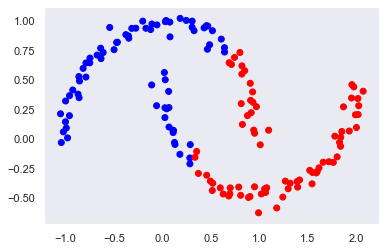

In [79]:
km.set_params(n_clusters=2)
ym_km = km.fit_predict(Xm)
plt.scatter(Xm[:, 0], Xm[:, 1], c=[colormap[c_id] for c_id in ym_km])
plt.grid()
plt.show()

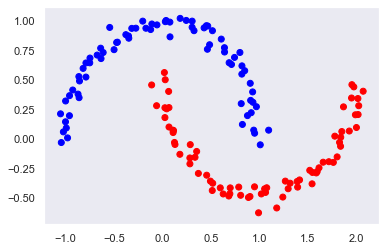

In [80]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=9, metric='euclidean')
ym_db = db.fit_predict(Xm)
plt.scatter(Xm[:, 0], Xm[:, 1], c=[colormap[c_id] for c_id in ym_db])
plt.grid()
plt.show()

DBSCAN algoritm vajab kahte parameetrit:
* maksimaalne kaugus $\epsilon$ (sklearn eps) punktide naabriks lugemiseks
* minimaalne naaberpunktide arv $MinPoints$ tuumpunktil

Vastavalt nendele parameetritele jagatakse andmepunktid kolmeks:
* **tuumpunktid**, mille raadiuses $\epsilon$ on $MinPoints$ või rohkem punkti
* **piiripunktid**, mis on vähemalt ühe tuumpunkti  raadiuses $\epsilon$
* ülejäänud punktid on **mürapunktid**

Selle punktide liigituse järgi moodustavad klastri tuumpunktid või tuumpunktide grupid, mis on seotud kaugusest $\eta$ lühemate ühendustega (st kõigi grupi elementide vahel ei pea kaugus olema lühem kui $eta$, aga neid peab siduma selliste väikeste kaugustega tee läbi teiste grupi tuumpunktide). Piiripunktid jaotatakse klastrite vahel vastavalt nende kaugustele tuumpunktidest.

Mürapunktid ei kuulu klastritesse.

See algoritm on küllaltki tundlik parameetrite $\epsilon, MinPoints$ valiku suhtes. Samuti ei pruugi see töötada hästi suure atribuutide arvu korral. Üldiselt ongi raske väheuuritud andmestiku jaoks ennustada, milline meetod on parim ja tasub proovida eri tüüpi meetodeid.


<a id='11_2'></a>
## Ülesanne 11.2

* Leida eelnevalt vaadeldud veinide andmestikule sobivaim klastrite arv vahemikust 2..9 (kaasa arvatud), rakendades küünarnukimeetodit st joonistades vastava graafiku.
* Leida eelnevalt vaadeldud veinide andmestikule sobivaim klastrite arv vahemikust 2..9 (kaasa arvatud), rakendades siluetimeetodit st joonistades vastava graafikud. Võib kasutada siin defineeritud funktsiooni   `draw_silhouette_plots(X)`.

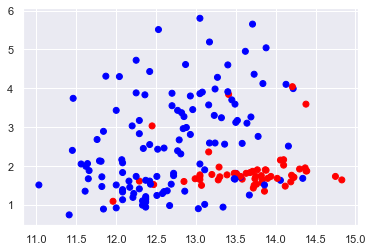

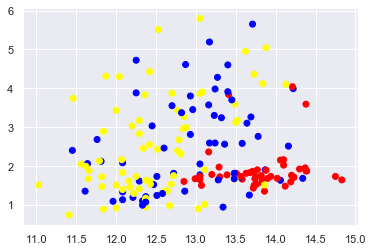

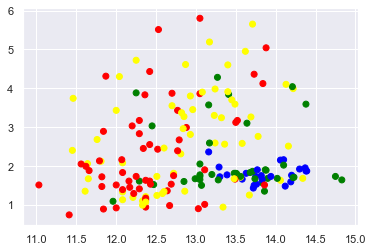

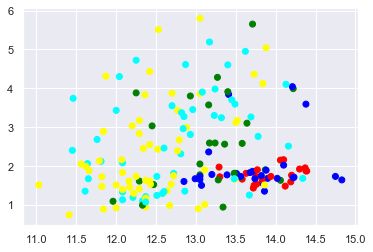

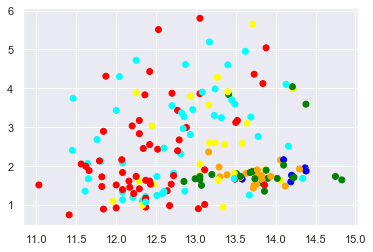

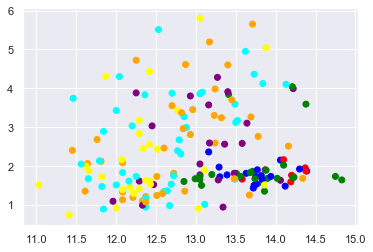

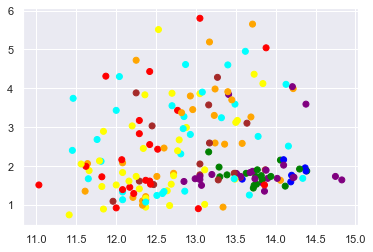

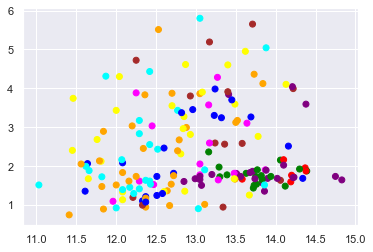

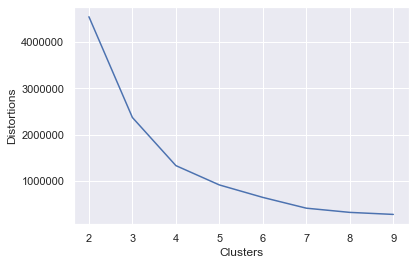

In [85]:
wine_data = load_wine()
X = wine_data.data
yw = wine_data.target

distortions = []
for i in range(2, 10):
    km.set_params(n_clusters=i)
    y_km_i = km.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=[colormap[c_id] for c_id in y_km_i])
    #plt.grid()
    plt.show()
    distortions.append(km.inertia_)
    
plt.plot(range(2, 10), distortions)
plt.xlabel("Clusters")
plt.ylabel("Distortions")
plt.show()

# Parim oleks n=4, kuna seal on hea suhe klastrite vähesuse ja distortions'ite vähesuse vahel

For n_clusters = 2 The average silhouette_score is : 0.6568536504294319
For n_clusters = 3 The average silhouette_score is : 0.5711381937868844
For n_clusters = 4 The average silhouette_score is : 0.560594106006063
For n_clusters = 5 The average silhouette_score is : 0.5489993239795691
For n_clusters = 6 The average silhouette_score is : 0.5656413100386389
For n_clusters = 7 The average silhouette_score is : 0.5616196384056904
For n_clusters = 8 The average silhouette_score is : 0.5398971441034137
For n_clusters = 9 The average silhouette_score is : 0.5316577207122241


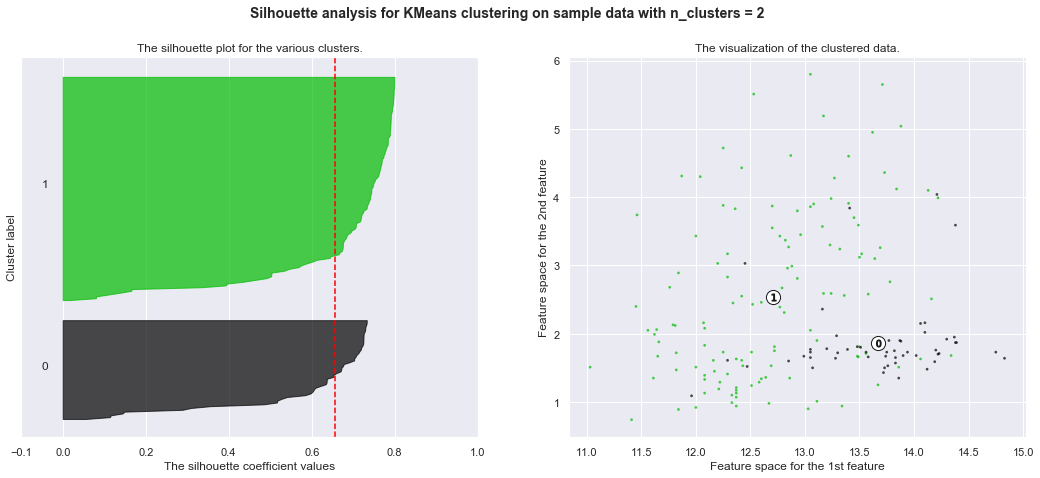

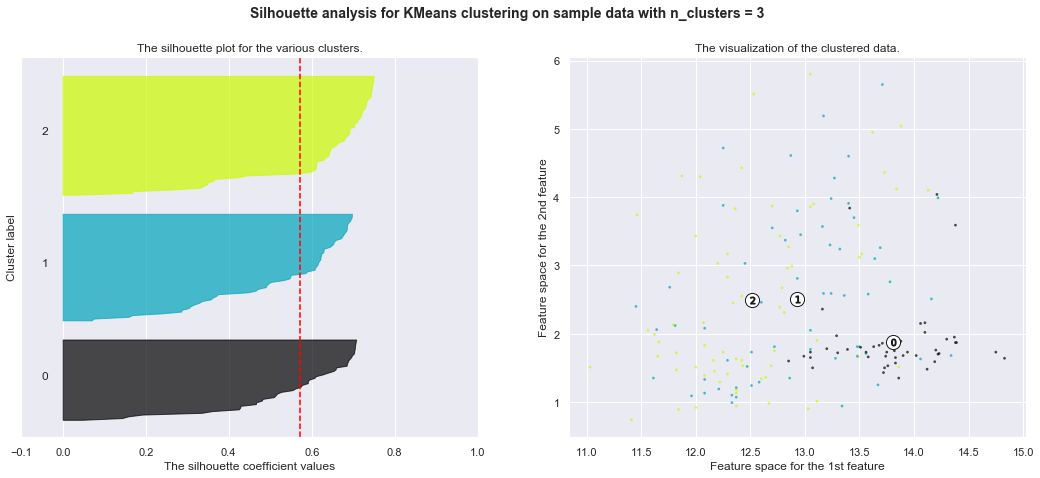

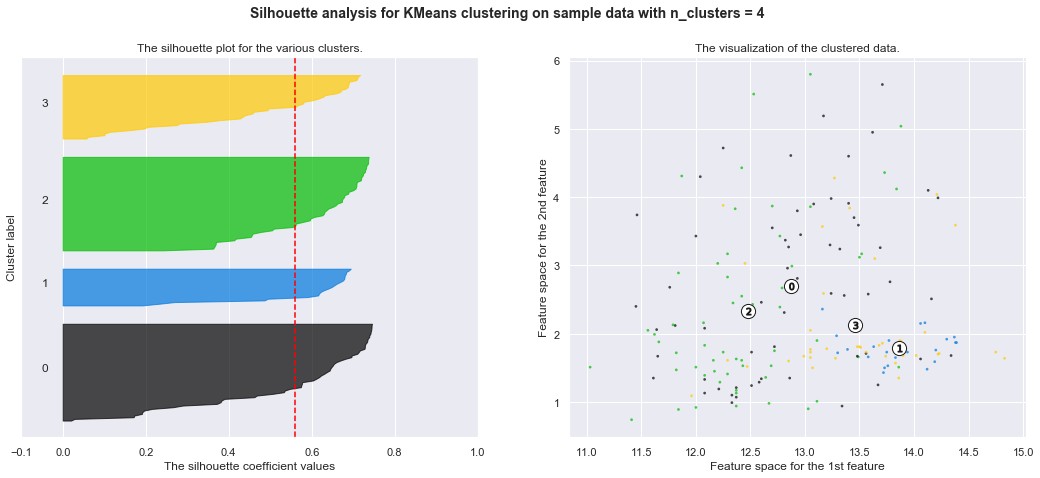

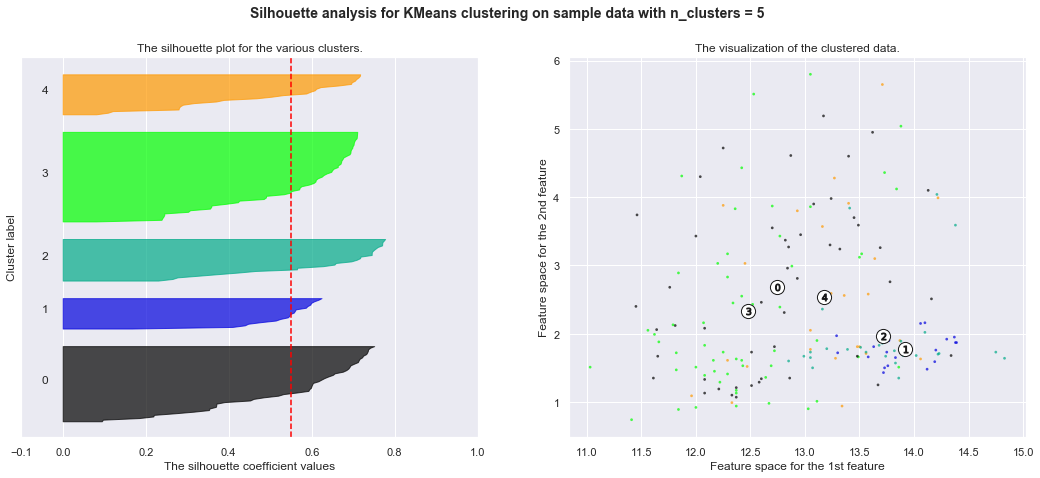

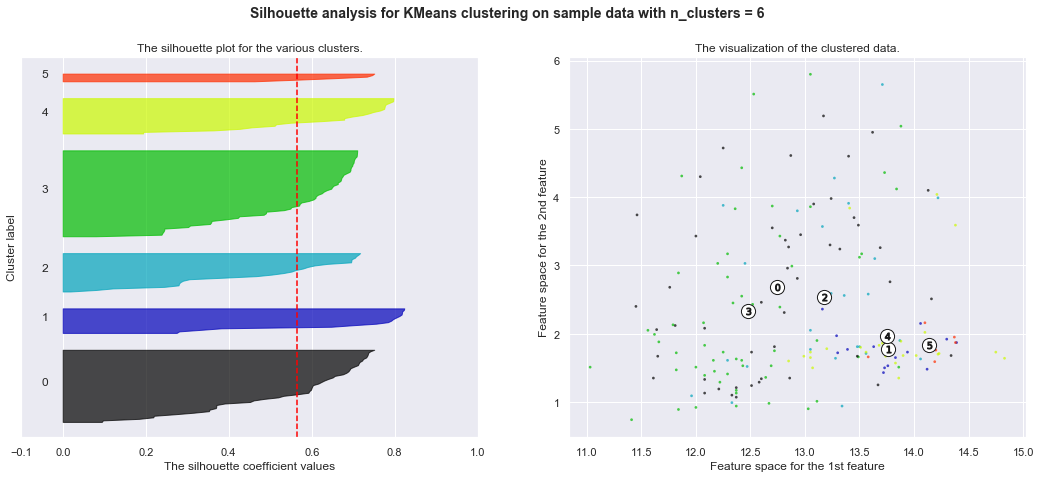

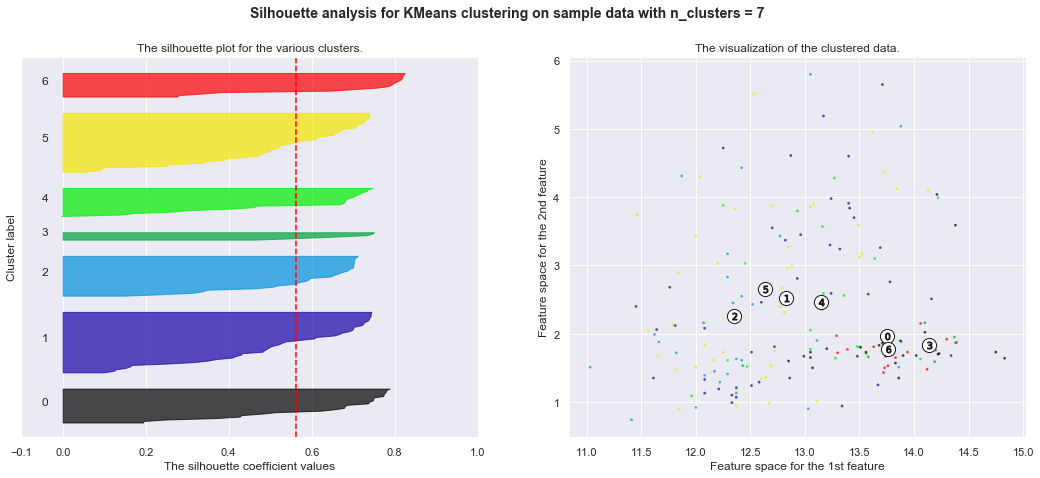

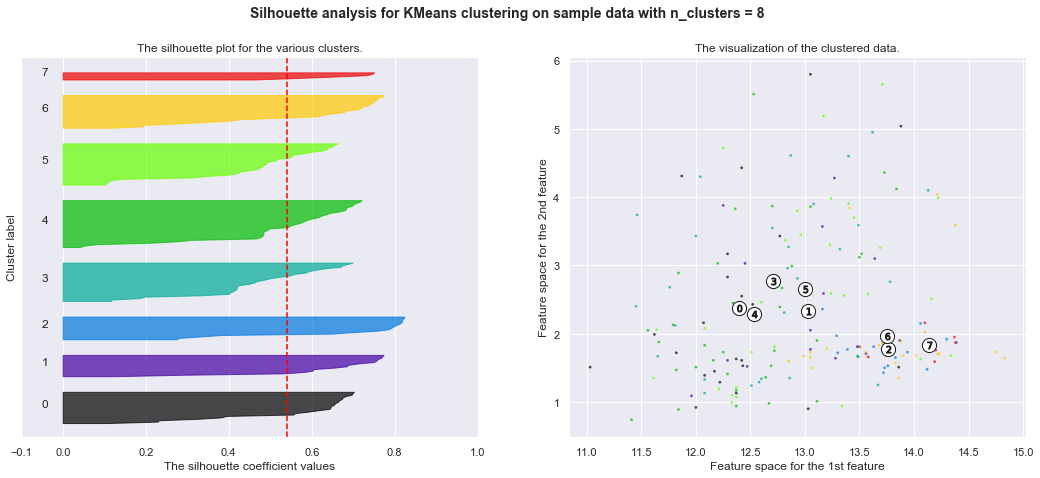

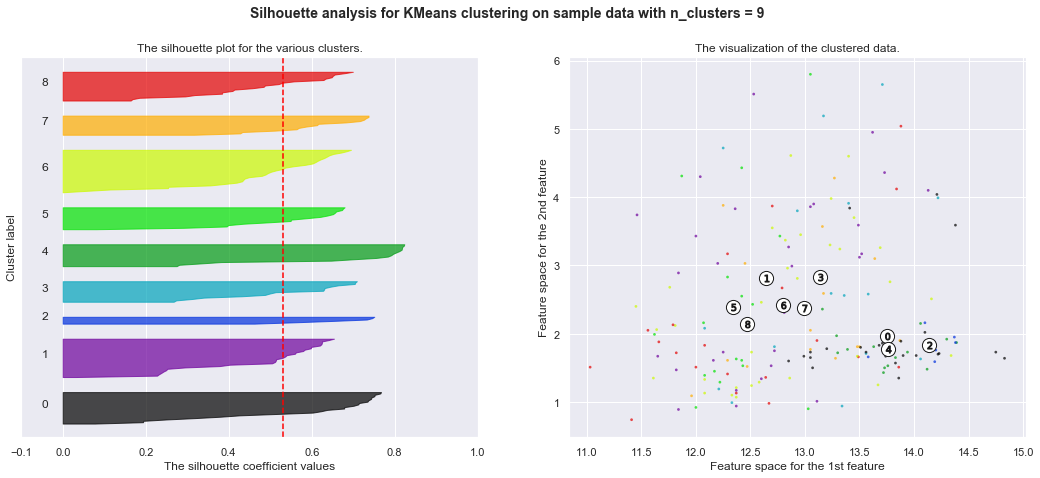

In [86]:
draw_silhouette_plots(X) # best is 2 with score 65.68%